#Importing Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.model_selection import train_test_split

#Import Dataset

In [ ]:
data = pd.read_csv('knn_datasets.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,3,126,88.0,41,235,39.3,0.704,27,0
1,8,99,84.0,0,0,35.4,0.388,50,0
2,7,196,90.0,0,0,39.8,0.451,41,1
3,9,119,80.0,35,0,29.0,0.263,29,1
4,11,143,94.0,33,146,36.6,0.254,51,1


**Mengecek shape dari dataset nya**

In [ ]:
data.shape

(480, 9)

#Pre Processing Data

**Mencari missing value**

In [ ]:
data.isnull().sum()

X1    0
X2    0
X3    1
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

Dari data diatas, bisa kita lihat terdapat 1 missing value pada kolom X3, maka dari itu kita akan menghilangkan semua data pada line missing value tersebut, dibawah ini ..

In [ ]:
data = data.dropna(axis=0)

**Melihat korelasi tiap atribut dan pada atribut target**

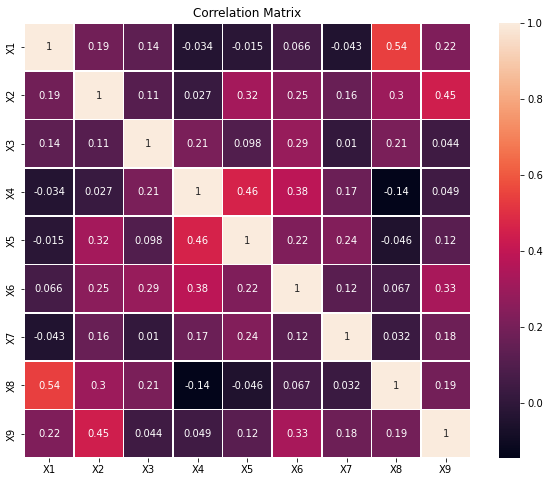

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,).set_title('Correlation Matrix')

plt.show()

Dari tabel diatas, kita bisa lihat korelasi tiap atribut, serta korelasi tiap atribut dari X1 - X8 dengan atribut X9. Saya akan menggunakan 3 atribut saja dengan korelasi lebih dari 0.2 (korelasi terbesar dengan X9) agar dapat mempercempat komputasi, yaitu X1 X2 dan X6

#Training and Testing Data

In [ ]:
X = np.array(data[['X1','X2','X6']])
y = np.array(data['X9'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Model K-Nearest Neighbour with Euclidean Distance

**Model**

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

In [ ]:
def predict(X_train, X_test, y_train, k):
    prediction = []
    for x1 in X_test:
        dist = []
        for x2 in X_train:
            dist.append(euclidean(x1, x2))
        dist = np.array(dist)
        k_best = np.argsort(dist)[:k]
        labels = y_train[k_best]
        prediction.append(mode(labels).mode[0])

    return prediction

**Function Menghitung RMSE**

In [ ]:
def calculate_rmse(y_test, y_pred):
	error = 0.0
	for i in range(len(y_test)):
		predError = y_pred[i] - y_test[i]
		error += (predError ** 2)
	meanError = error / float(len(y_test))
	return np.sqrt(meanError)

**Function Menghitung Accuracy**

In [ ]:
def calculate_accuracy(y_test, y_pred):
	facc = 0
	for i in range(len(y_test)):
		if y_test[i] == y_pred[i]:
			facc += 1
	return facc / float(len(y_test)) * 100.0

**Membandingkan RMSE dengan K values dengan elbow method**

Text(0, 0.5, 'RMSE')

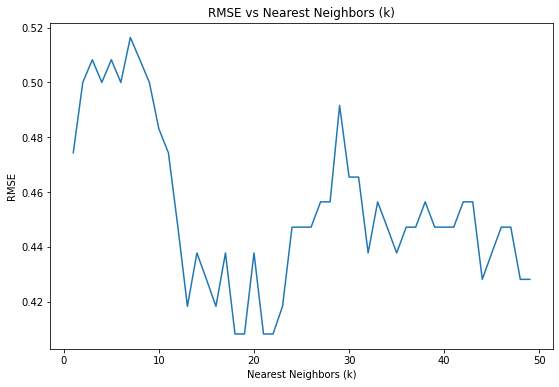

In [ ]:
euclidean_acc = []

for k in range(1,50):
    y_pred = predict(X_train, X_test, y_train, k)
    euclidean_acc.append(calculate_rmse(y_test, y_pred))

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(1,50), euclidean_acc)
plt.title('RMSE vs Nearest Neighbors (k)')
ax.set_xlabel('Nearest Neighbors (k)')
ax.set_ylabel('RMSE')

**Membandingkan Accuracy dengan K values dengan elbow method**

Text(0, 0.5, 'Accuracy')

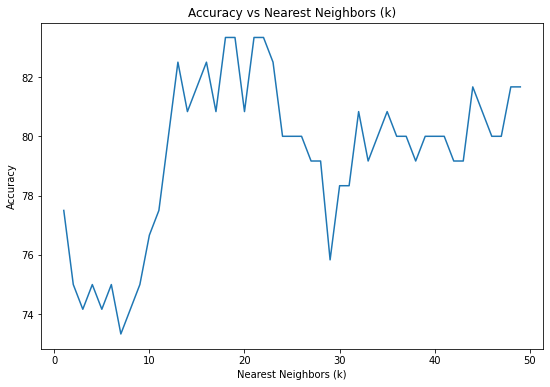

In [ ]:
euclidean_acc = []
max_acc = 0

for k in range(1,50):
    y_pred = predict(X_train, X_test, y_train, k)
    euclidean_acc.append(calculate_accuracy(y_test, y_pred))
    if max_acc <= calculate_accuracy(y_test, y_pred):
        max_acc = calculate_accuracy(y_test, y_pred)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(1,50), euclidean_acc)
plt.title('Accuracy vs Nearest Neighbors (k)')
ax.set_xlabel('Nearest Neighbors (k)')
ax.set_ylabel('Accuracy')

In [ ]:
all_k_m = []
index = 0
for i in euclidean_acc:
    index = index+1
    if i == max_acc :
        all_k_m.append(index)

print('Akurasi terbesar terdapat pada k : ' + str(all_k_m) + ' dengan akurasi ' + str(max_acc) + ' %')

Akurasi terbesar terdapat pada k : [18, 19, 21, 22] dengan akurasi 83.33333333333334 %


Didapatkan akurasi tertinggi sebesar 83.334% dengan k = 18, 19, 21, 22

#Model Evaluation

**Menggunakan salah satu k dengan akurasi terbaik**

In [ ]:
y_pred = predict(X_train, X_test, y_train, 18)

**Mencari True Positive, True Negative, False Positive, False Negative**

In [ ]:
TrueP = 0
TrueN = 0
FalseP = 0
FalseN = 0

for x in range(len(y_test)):
    if y_test[x] == 1 and y_pred[x] == 1:
        TrueP+= 1
    if y_test[x] == 0 and y_pred[x] == 0:
        TrueN+= 1
    if y_test[x] == 0 and y_pred[x] == 1:
        FalseP+= 1
    if y_test[x] == 1 and y_pred[x] == 0:
        FalseN+= 1

In [ ]:
TrueP, TrueN, FalseP, FalseN

(25, 75, 6, 14)

**Evaluasi model dengan mencari akurasi, presisi, dan recall**

In [ ]:
Accuracy = calculate_accuracy(y_test, y_pred)
Precision = TrueP / (TrueP + FalseP)
Recall = TrueP / (TrueP + FalseN)
print(f'Accuracy : {Accuracy} % ')
print(f'Precision : {Precision}')
print(f'Recall : {Recall}')

Accuracy : 83.33333333333334 % 
Precision : 0.8064516129032258
Recall : 0.6410256410256411


Dari data diatas, didapat accuracy, precision, dan recall. Dimana akurasinya cukup bagus sebesar 83.34%

#Confusion Matrix

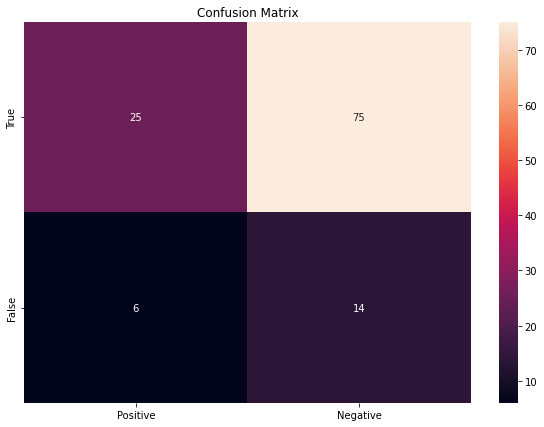

In [ ]:
confMatrix = np.array([[TrueP,TrueN],[FalseP,FalseN]])

labels = ['Positive', 'Negative']
labels2 = ['True', 'False']
plt.figure(figsize = (10,7))
ax= plt.subplot()
sns.heatmap(confMatrix, annot=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels2)
plt.title('Confusion Matrix')
plt.show()